# preprocessing

In [127]:
import numpy as np
import pandas as pd

df = pd.read_csv('data/amazon_reviews.txt', sep='\t')
df.head(3)

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT
0,1,__label1__,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav..."
1,2,__label1__,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...
2,3,__label1__,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...


As we can see the dataset is completely balanced. label 1 if for fake reviews, label 2 for real reviews. As we can see there are no null values.

In [128]:
df['LABEL'].value_counts()

LABEL
__label1__    10500
__label2__    10500
Name: count, dtype: int64

In [129]:
df['PRODUCT_CATEGORY'].value_counts()

PRODUCT_CATEGORY
PC                        700
Wireless                  700
Watches                   700
Musical Instruments       700
Home Entertainment        700
Pet Products              700
Lawn and Garden           700
Apparel                   700
Video Games               700
Luggage                   700
Outdoors                  700
Shoes                     700
Home Improvement          700
Tools                     700
Video DVD                 700
Grocery                   700
Books                     700
Jewelry                   700
Home                      700
Sports                    700
Camera                    700
Electronics               700
Furniture                 700
Kitchen                   700
Toys                      700
Health & Personal Care    700
Beauty                    700
Office Products           700
Baby                      700
Automotive                700
Name: count, dtype: int64

In [130]:
df.isnull().sum()

DOC_ID               0
LABEL                0
RATING               0
VERIFIED_PURCHASE    0
PRODUCT_CATEGORY     0
PRODUCT_ID           0
PRODUCT_TITLE        0
REVIEW_TITLE         0
REVIEW_TEXT          0
dtype: int64

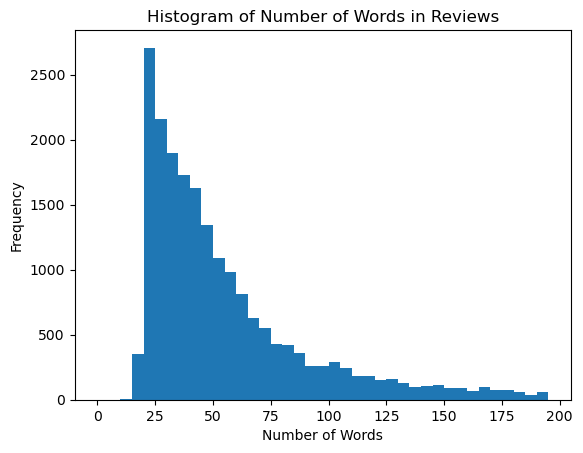

In [131]:
import matplotlib.pyplot as plt

word_counts = df['REVIEW_TEXT'].apply(lambda x: len(x.split()))
plt.hist(word_counts, bins=range(0, 200, 5))
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Words in Reviews')
plt.show()

# NLP preprocessing:

In [137]:
from nltk import pos_tag, PorterStemmer, NaiveBayesClassifier
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from nltk.corpus import wordnet

# def get_wordnet_pos(treebank_tag):
# 
#     if treebank_tag.startswith('J'):
#         return wordnet.ADJ
#     elif treebank_tag.startswith('V'):
#         return wordnet.VERB
#     elif treebank_tag.startswith('N'):
#         return wordnet.NOUN
#     elif treebank_tag.startswith('R'):
#         return wordnet.ADV
#     else:
#         return wordnet.NOUN

# tokenize words
# remove stop words
# stemming
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = PorterStemmer()
        self.tokenizer = RegexpTokenizer(r'\b(?:(?!www\.|http|\.com)[a-z]{2,})\b')
    def __call__(self, articles):
        tokens = [self.wnl.stem(x) for x in self.tokenizer.tokenize(articles)]
        return tokens

stop_words = list(stopwords.words('english'))
tfidf_vectorizer = TfidfVectorizer(tokenizer=LemmaTokenizer(), token_pattern=None, stop_words=stop_words)
bow_vectorizer = CountVectorizer(tokenizer=LemmaTokenizer(), token_pattern=None, stop_words=stop_words)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Utente\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Utente\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Utente\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Utente\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Create Word2Vec model

In [133]:
from gensim.models import Word2Vec
import time
# Skip-gram model (sg = 1)
size = 1000
window = 3
min_count = 1
workers = 3
sg = 1

word2vec_model_file =  'models/word2vec_' + str(size) + '.model'
start_time = time.time()
# Tokenize the text column to get the new column 'stemmed_tokens'
df['stemmed_tokens'] = df['REVIEW_TEXT'].apply(lambda x: LemmaTokenizer()(x))
stemmed_tokens = pd.Series(df['stemmed_tokens']).values
# Train the Word2Vec Model
w2v_model = Word2Vec(stemmed_tokens, min_count = min_count, vector_size = size, workers = workers, window = window, sg = sg)
print("Time taken to train word2vec model: " + str(time.time() - start_time))
w2v_model.save(word2vec_model_file)

[list(['least', 'think', 'product', 'save', 'day', 'keep', 'around', 'case', 'need', 'someth'])
 list(['batteri', 'someth', 'new', 'introduc', 'market', 'averag', 'develop', 'cost', 'rel', 'high', 'compromis', 'qualiti', 'provid', 'us', 'best', 'low', 'cost', 'br', 'mani', 'built', 'technic', 'assist', 'act', 'like', 'sensor', 'particular', 'batteri', 'keep', 'phone', 'charg', 'work', 'everi', 'voltag', 'high', 'voltag', 'never', 'risk'])
 list(['purchas', 'swing', 'babi', 'month', 'pretti', 'much', 'grown', 'loud', 'swing', 'well', 'beauti', 'though', 'love', 'color', 'lot', 'set', 'think', 'worth', 'money'])
 ...
 list(['love', 'moccasin', 'fit', 'like', 'custom', 'made', 'br', 'soft', 'comfort', 'leather', 'bottom', 'wear', 'everywher', 'except', 'walk', 'street', 'side', 'walk', 'dont', 'want', 'wear', 'also', 'inner', 'sole', 'pad', 'mention', 'comfort'])
 list(['wish', 'littl', 'durabl', 'got', 'caught', 'bolt', 'cross', 'bunk', 'feed', 'calv', 'big', 'hole', 'problem', 'color', 

# model evaluation

In [138]:
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from scipy.sparse import hstack
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

classifiers = [
    RandomForestClassifier(random_state=42, n_jobs=-1),
    GaussianNB(),
    KNeighborsClassifier(n_jobs=-1),
]
vectorizers = [
    tfidf_vectorizer,
    bow_vectorizer,
]

pipes = []
pipes_names = []
for clf in classifiers:
    for vectorizer in vectorizers:
        for useVP in [True, False]:
            transformers = [
                ('vectorizer', vectorizer, 'REVIEW_TEXT'),
            ]
            if useVP:
                transformers.append(('encoder', OneHotEncoder(), ['VERIFIED_PURCHASE']))
            pipes.append(Pipeline([
                ('preprocessor', ColumnTransformer(transformers, n_jobs=-1)),
                ('clf', clf)
            ]))
            pipes_names.append(f'{clf.__class__.__name__}_{vectorizer.__class__.__name__}_{"VP" if useVP else "noVP"}')

param_grids = {
    'RandomForestClassifier': {
        'clf__n_estimators': [50, 100, 200],
        'clf__max_depth': [10, 20, None],
        'clf__min_samples_split': [2, 5, 10],
    },
    'KNeighborsClassifier': {
        'clf__n_neighbors': [3, 5, 7],
        'clf__weights': ['uniform', 'distance'],
        'clf__p': [1, 2],  # p=1 for Manhattan, p=2 for Euclidean
    },
    'GaussianNB': {
        'clf__var_smoothing': [1e-9, 1e-8, 1e-7],
    }
}

inner_cv = KFold(n_splits=2)
outer_cv = KFold(n_splits=2)

for pipe, pipe_name in zip(pipes, pipes_names):
    print(pipe_name)
    clf_name = pipe.steps[-1][1].__class__.__name__
    grid = param_grids[clf_name]
    clf = GridSearchCV(estimator=pipe, param_grid=grid, cv=inner_cv, verbose=1)
    scores = cross_val_score(clf, X=df, y=df['LABEL'], cv=outer_cv)
    print('Accuracies: ' + str(scores) + '\n'
          + 'Mean Accuracy: ' + str(scores.mean()) + '\n')


RandomForestClassifier_TfidfVectorizer_VP
Fitting 2 folds for each of 27 candidates, totalling 54 fits


KeyboardInterrupt: 